In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ClusterBasing_old import ClusterBasing
from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import PlotScatter,GetLineOfOptima,GetOptimalT

In [ ]:
basefolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/';

#    parameterfile = 'ProteinData_ttx_1hr_2/Analysis_dataWindow_3/dataWindow_3_parameters';
#    parameterfile = 'ProteinData_ttx_1hr_2/Analysis_dataWindow_7/dataWindow_7_parameters';    
parameterfile = 'MikeData/Analysis_dataWindow_1/dataWindow_1_parameters';    

In [ ]:
CB = ClusterBasing(basefolder,parameterfile);
CB.GetClusterings_InOutCell();

In [ ]:
CB.GetReferenceClustering(bestRequiredRate=0.55);
CB.GetClustering();

In [ ]:
#Plot Overview
fig,axs = plt.subplots(1,2,figsize=(12,5));
PlotScatter(CB.XC_incell,ax=axs[0])
PlotScatter(CB.XC_outcell,ax=axs[1])
#np.savetxt(outputfolder_R+analysis_name+"_filtered_incell.txt",XC_incell,fmt="%f\t%f");    
axs[0].set_title('in cell,'+str(len(CB.XC_incell))+' points');
#axs[0].set_xlim(150,158);
#axs[0].set_ylim(140,147);

axs[1].set_title('out cell, '+str(len(CB.XC_outcell))+' points');
for ax in axs:
    ax.set_aspect('equal');

if(True): 
    axs[0].axis('off');
    axs[1].axis('off')
    
    axs[0].set_title('Inside of cell');
    axs[1].set_title('Reference -- Outside of cell');
#axs[1].set_xlim([50,60]);
#axs[1].set_ylim([50,60]);

plt.savefig(CB.save_name+"_localizations_incell_vs_outcell.pdf",bbox_inches="tight");
plt.savefig(CB.save_name+"_localizations_incell_vs_outcell.png",bbox_inches="tight");

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(8,10));

ax = axs[0,0];
heatmap1_data = pd.pivot_table(CB.phasespace_all, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('no_clusters');

ax = axs[0,1];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('no_clusters above T');

ax = axs[1,0];
heatmap1_data = pd.pivot_table(CB.phasespace_all, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()
ax.set_title('similarityScore');

ax = axs[1,1];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax,);
ax.invert_yaxis()
ax.set_title('similarityScore above T');

plt.tight_layout()

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(18,6));


row_ps = CB.phasespace_all_aboveT.loc[175,:];

PlotScatter(CB.XC_incell,row_ps['labels'],ax=axs[0])
PlotScatter(CB.XC_outcell,row_ps['labels_ref'],ax=axs[1])
if('T' in CB.phasespace_all_aboveT.columns):
    axs[0].set_title('in cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
    axs[1].set_title('out cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');
else:
    axs[0].set_title('in cell for '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
    axs[1].set_title('out cell for ' +str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');            

#axs[1].set_ylim([57500,62500]);
#axs[1].set_xlim([55000,60000]);

if(False): 
    axs[0].axis('off');
    axs[1].axis('off')

    axs[0].set_title('Inside of cell');
    axs[1].set_title('Reference -- Outside of cell');

plt.savefig(CB.save_name+"_OptimalClustering.png",bbox_inches="tight");

ax = axs[2];
heatmap1_data = pd.pivot_table(CB.phasespace_all_aboveT, values='similarityScoreChosen', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=ax);
ax.invert_yaxis()


ax.set_title('similarityScoreChosen');

In [ ]:
def PlotAllClustersAlongOptimumAboveT(CB,name):
    
    df_opt_th_aboveT     = GetLineOfOptima(CB.phasespace_all_aboveT[['sigma', 'threshold','similarityScore','no_clusters']],'threshold','similarityScore');
    
    for idx,row in df_opt_th_aboveT.iterrows():
        row_ps = CB.phasespace_all_aboveT.loc[row['idx'],:];

        sigma = row['sigma'];
        threshold = row['threshold'];

        fig,axs = plt.subplots(1,2,figsize=(13,8)); 
        PlotScatter(CB.XC_incell,row_ps['labels'],ax=axs[0])
        PlotScatter(CB.XC_outcell,row_ps['labels_ref'],ax=axs[1])
        if('T' in CB.phasespace_all_aboveT.columns):
            axs[0].set_title('in cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
            axs[1].set_title('out cell for clusters with size > '+str(row_ps['T'])+' , '+str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');
        else:
            axs[0].set_title('in cell for '+str(len(np.unique(row_ps['labels']))-1)+' clusters');
            axs[1].set_title('out cell for ' +str(len(np.unique(row_ps['labels_ref']))-1)+' clusters');            

        #axs[1].set_ylim([57500,62500]);
        #axs[1].set_xlim([55000,60000]);

        if(False): 
            axs[0].axis('off');
            axs[1].axis('off')

            axs[0].set_title('Inside of cell');
            axs[1].set_title('Reference -- Outside of cell');

        plt.savefig(CB.save_name+"_OptimalClustering_split_threshold_"+str(threshold)+"_"+name+".png",bbox_inches="tight");

In [ ]:
PlotAllClustersAlongOptimumAboveT(CB,'aboveT')

In [ ]:
df_incell   = CB.df_clusterSizes_all[(CB.df_clusterSizes_all['type']=='incell')];
df_outcell  = CB.df_clusterSizes_all[(CB.df_clusterSizes_all['type']=='outcell')];
GetOptimalTH(df_incell,df_outcell,criterion='clusterSize',min_noClustersToAnalyse=10,bestRequiredRate=0.8)

In [8]:
from ClusterBasing import ClusterBasing
from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import PlotScatter,LoadPoints
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

basefolder    = "../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/";
outputfolder  = basefolder+"Output/"


intensity_quantile_cutoff = 0.95;
sigma_gaussian_filter     = 5;
size_quantile_connected_components_include = 0.5;
N_x                       = 1000;
N_select                  = 1000;

outputfolder_window       = outputfolder+"2021_09_29__17_12_02/";#outputfolder+'2021_09_29__14_12_21/';

10000 points loaded from ../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_29__17_12_02/X_incell_window.txt
10000 points loaded from ../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_29__17_12_02/X_outcell_window.txt
Loaded Clustering results from ../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_29__17_12_02/analysisclustering_incell.pickle
Loaded Clustering results from ../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20/Output/2021_09_29__17_12_02/analysisclustering_outcell.pickle
0.9
T= 1016


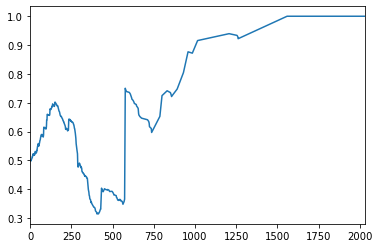

In [9]:
CB = ClusterBasing(outputfolder_window);
CB.GetClusterings_InOutCell();
CB.GetReferenceClustering(bestRequiredRate=0.9);

sigma                                                                0.739701
threshold                                                                 3.0
labels                      [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
labels_ref                  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
no_clusters                                                               2.0
no_clusters_ref                                                           2.0
no_clusters_s_vs_n                                                   0.695652
T                                                                        1016
percent_locsIncluded                                                   0.5392
percent_locsIncluded_ref                                               0.2286
similarityScoreChosen                                                       2
Name: 196, dtype: object


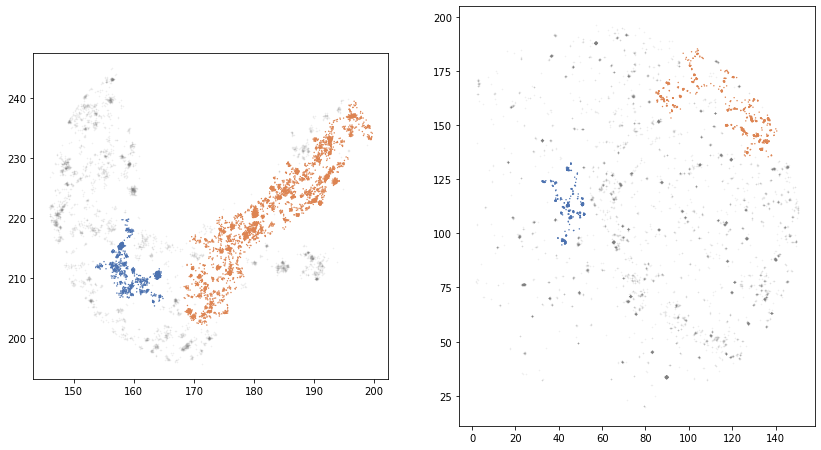

In [10]:
row_sel = CB.GetClustering(criterion='percent_locsIncluded');
fig,axs = plt.subplots(1,2,figsize=(14,8));
PlotScatter(CB.XC_incell,row_sel['labels'],ax=axs[0]);
PlotScatter(CB.XC_outcell,row_sel['labels_ref'],ax=axs[1]);
#sns.scatterplot(x=CB.XC_incell[:,0],y=CB.XC_incell[:,1],hue=labels,palette='Set1');
axs[0].set_aspect(1);
axs[1].set_aspect(1);

In [14]:
CB.phasespace_all_aboveT

,sigma,threshold,labels,time,no_clusters,similarityScore,labels_ref,no_clusters_ref,time_ref
0,0.110702,3.0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.225041,299,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",236,0.094062
1,0.110702,4.0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.228479,119,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",88,0.104887
2,0.110702,5.0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.189663,68,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",35,0.095077
3,0.110702,6.0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.173450,45,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",18,0.087337
4,0.110702,7.0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.143437,28,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",7,0.088906
...,...,...,...,...,...,...,...,...,...
205,0.739701,16.0,"[0, -1, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, ...",0.752153,66,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, ...",81,0.340817
206,0.739701,18.0,"[0, -1, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, ...",1.089094,64,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, ...",82,0.313343
207,0.739701,22.0,"[0, -1, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, ...",0.681696,58,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, ...",74,0.387833
208,0.739701,25.0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0.637436,53,NaN,"[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, ...",69,0.435721


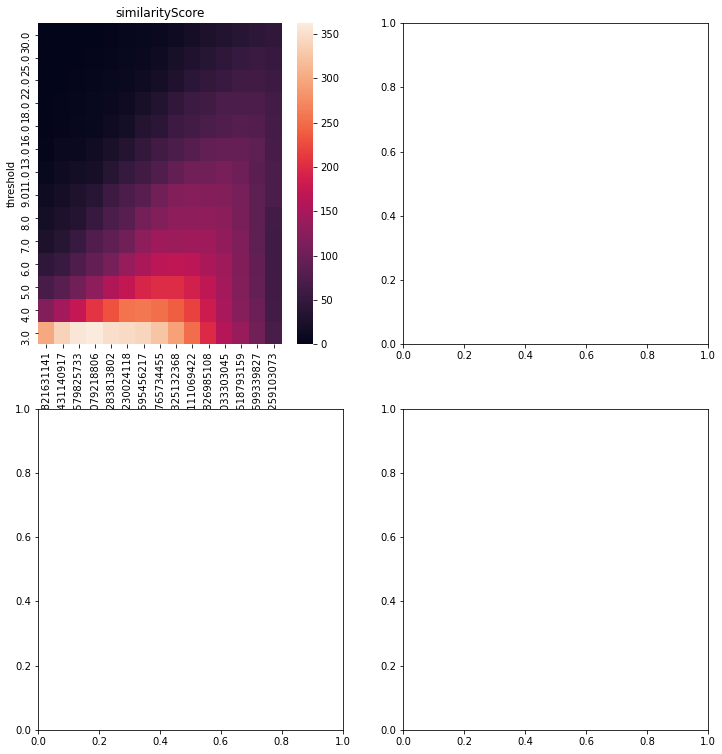

In [13]:
fig,axs = plt.subplots(2,2,figsize=(12,13));


heatmap1_data = pd.pivot_table(CB.phasespace_all, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data,ax=axs[0,0]);
ax.invert_yaxis()
ax.set_title('similarityScore');

In [ ]:
from FigX4_Explore2DOptimizer_withReference_Streamlined_Functions import RemoveLabelsSmallerT

In [ ]:
phasespace_all      = CB.phasespace_all;
df_clusterSizes_all = CB.df_clusterSizes_all;
labels_outcell = [];
T_ = 162;
criterion='clusterSize';

#for idx,row in phasespace_all.iterrows():
row = phasespace_all.loc[123,:];

th,si = row['threshold'],row['sigma'];

df_outcell  = df_clusterSizes_all[(df_clusterSizes_all['threshold']==th)&\
                (df_clusterSizes_all['sigma']==si)&\
                (df_clusterSizes_all['type']=='outcell')];

#*******************************************************
# Get labels of clusters larger than T
#        l_ = RemoveLabelsSmallerT(row['labels'],df_incell,T_,criterion)
#        labels_incell.append(l_);
#        percent_locsIncluded_aboveT.append(np.sum(l_>=0)/len(l_))
l_ = RemoveLabelsSmallerT(row['labels_ref'],df_outcell,T_,criterion)

#        percent_locsIncluded_aboveT_ref.append(np.sum(l_>=0)/len(l_))
#*******************************************************